In [1]:
import json
from urllib.request import urlopen # python 3.x 버전에서 사용 (2.x 버전이라면 from urllib import urlopen)
from PyQt5 import QtWidgets
from PyQt5.QtWidgets import *
import functools as fc
import sys
#클릭한 목록에 대한 하위 목록 생성
class NewWindow(QtWidgets.QMainWindow):
    def __init__(self, parent=None):
        super(NewWindow, self).__init__(parent)
        centralWidget = QWidget()
        self.setCentralWidget(centralWidget)
        self.setGeometry(300, 300, 500, 500)
        Setting(self, List_Id)
#최상위 목록 생성
class MyWindow(QtWidgets.QMainWindow, QPushButton):
    def __init__(self):
        super(MyWindow, self).__init__()
        centralWidget = QWidget()
        self.setCentralWidget(centralWidget)
        self.setGeometry(200, 200, 500, 500)
        self.setStyleSheet("background-color: white")
        Setting(self, 'A')
 #목록 셋팅 함수
def Setting(self, parentId):
    #url을 통해 json 데이터 가져오기
    with urlopen(
        "https://kosis.kr/openapi/Param/statisticsParameterData.do?method=getList&apiKey=MThiMTliOTI2NTZiNjAxMTE3YzNhMDI5MDFiZDI3ZWU=&itmId=T100+T110+T120+T130+T131+T132+T140+T141+T142+T200+T210+T220+T230+T310+T311+T312+T313+T314+T315+T320+&objL1=04+05+03+38+&objL2=&objL3=&objL4=&objL5=&objL6=&objL7=&objL8=&format=json&jsonVD=Y&prdSe=Y&startPrdDe=2015&endPrdDe=2021&orgId=101&tblId=DT_1IN1502") as url:
        json_file = url.read()
    py_json = json.loads(json_file.decode('utf-8'))
    #하위 목록이 있다면 LinkButton, 하위 목록이 없다면 label로 생성
    for i, v in enumerate(py_json):
        if 'LIST_NM' in v:
            btn = QCommandLinkButton(v['LIST_NM'], self)
            btn.setStyleSheet("Text-align: left;"
            "border: none;"
            )
            btn.setGeometry(100, 50 * i, 500, 40)
            btn.clicked.connect(fc.partial(Action, self, v['LIST_ID']))
        else:
            lbl = QLabel(v['TBL_NM'], self)
            lbl.setGeometry(100, 50 * i, 500, 40)
def Action(self, check):
    global List_Id
    List_Id = check
    NewWindow(self).show()
if __name__ == "__main__":
    app = QtWidgets.QApplication(sys.argv)
    window = MyWindow()
    window.show()
    sys.exit(app.exec_())

SystemExit: 0

c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3406: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


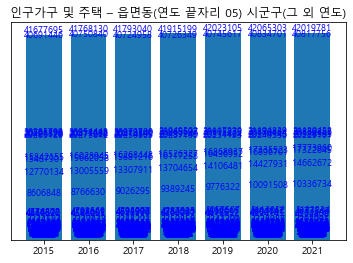

In [2]:
import json
from urllib.request import urlopen # python 3.x 버전에서 사용 (2.x 버전이라면 from urllib import urlopen)
import matplotlib.pyplot as plt
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
#url을 통해 json 데이터 가져오기
with urlopen("https://kosis.kr/openapi/Param/statisticsParameterData.do?method=getList&apiKey=MThiMTliOTI2NTZiNjAxMTE3YzNhMDI5MDFiZDI3ZWU=&itmId=T100+T110+T120+T130+T131+T132+T140+T141+T142+T200+T210+T220+T230+T310+T311+T312+T313+T314+T315+T320+&objL1=04+05+03+38+&objL2=&objL3=&objL4=&objL5=&objL6=&objL7=&objL8=&format=json&jsonVD=Y&prdSe=Y&startPrdDe=2015&endPrdDe=2021&orgId=101&tblId=DT_1IN1502") as url:
    json_file = url.read()
py_json = json.loads(json_file.decode('utf-8'))
#변수 지정 및 데이터 저장
xAxis = []
yAxis = []
title = ''
for i, v in enumerate(py_json):
    xAxis.append(v['PRD_DE']) #x축에 들어갈 데이터
    yAxis.append(int(v['DT'])) #y축에 들어갈 데이터
    if i == 0 :
        title = v['TBL_NM'] #차트제목
#Bar차트 그리기
plt.bar(xAxis, yAxis)
plt.title(title)
#y축 수치를 안보이게 하는 코드. 필요에 따라 선택하여 사용
plt.gca().axes.yaxis.set_visible(False)
#Bar의 가운데에 text로 수치 표시트)
for i, v in enumerate(xAxis):
    plt.text(v, yAxis[i], yAxis[i],
    fontsize = 9,
    color='blue',
    horizontalalignment='center',
    verticalalignment='bottom')
plt.show()
